In [3]:
import pandas as pd

# Load your datasets
sales_data = pd.read_csv('/content/Pizza_Sale - pizza_sales.csv')  # Replace with your sales data path
ingredients_data = pd.read_csv('/content/Pizza_ingredients - Pizza_ingredients.csv')  # Replace with your ingredients data path

In [4]:
# Display basic information about the dataset
print(sales_data.info())
print(sales_data.describe())
print(sales_data.shape)  # (rows, columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48604 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48613 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48597 non-null  object 
 10  pizza_ingredients  48607 non-null  object 
 11  pizza_name         48613 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB
None
           pizza_id      order_id      quantity    unit_price   total_price
count  48620.000000  48620.000000  48620.000000  48620.000000  48613.000000


In [5]:
# Check the data types of each column
print(sales_data.dtypes)

# Check for categorical vs continuous variables
categorical_cols = sales_data.select_dtypes(include=['object']).columns
continuous_cols = sales_data.select_dtypes(include=['float64', 'int64']).columns

print("Categorical Columns:", categorical_cols)
print("Continuous Columns:", continuous_cols)

pizza_id               int64
order_id               int64
pizza_name_id         object
quantity               int64
order_date            object
order_time            object
unit_price           float64
total_price          float64
pizza_size            object
pizza_category        object
pizza_ingredients     object
pizza_name            object
dtype: object
Categorical Columns: Index(['pizza_name_id', 'order_date', 'order_time', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')
Continuous Columns: Index(['pizza_id', 'order_id', 'quantity', 'unit_price', 'total_price'], dtype='object')


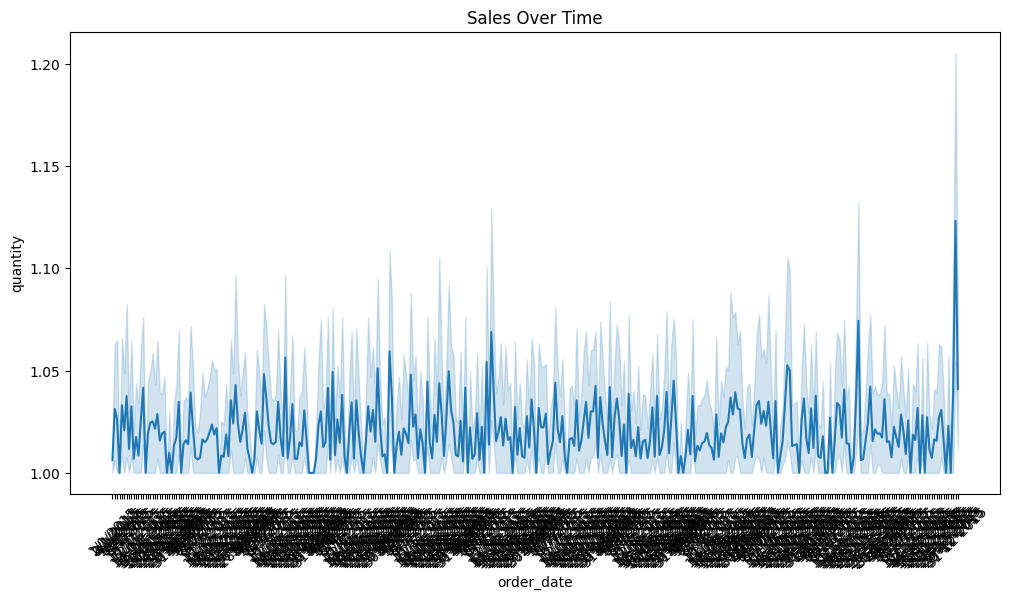

In [8]:
# Visualize relationships between variables
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Sales over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_data, x='order_date', y='quantity')
plt.title('Sales Over Time')
plt.xticks(rotation=45)
plt.show()

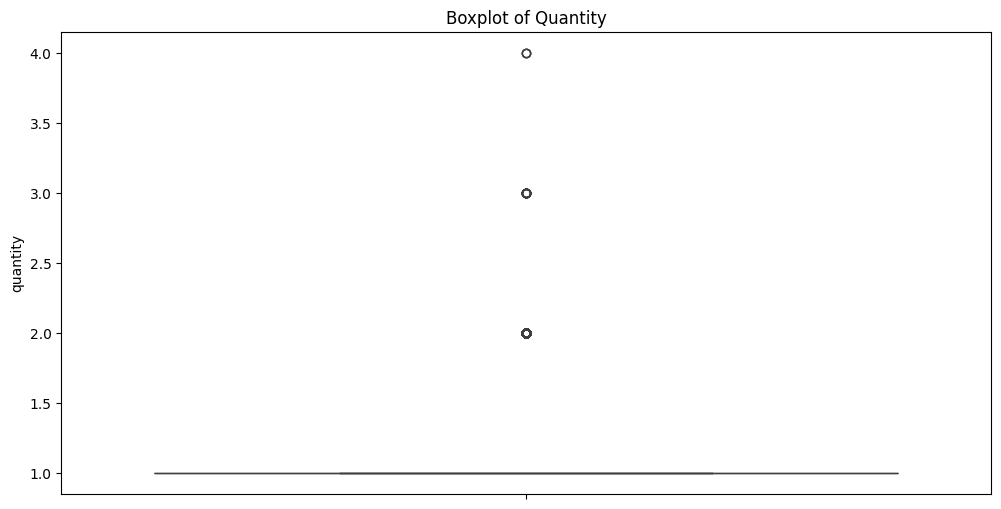

In [9]:
# Boxplot to identify outliers in quantity sold
plt.figure(figsize=(12, 6))
sns.boxplot(data=sales_data, y='quantity')
plt.title('Boxplot of Quantity')
plt.show()

In [10]:
# Check for missing values
missing_values = sales_data.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 pizza_name_id        16
total_price           7
pizza_category       23
pizza_ingredients    13
pizza_name            7
dtype: int64


In [14]:
# Check for duplicates
duplicates = sales_data.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 0


In [13]:
# Check the data types of each column
print(sales_data.dtypes)

pizza_id               int64
order_id               int64
pizza_name_id         object
quantity               int64
order_date            object
order_time            object
unit_price           float64
total_price          float64
pizza_size            object
pizza_category        object
pizza_ingredients     object
pizza_name            object
dtype: object


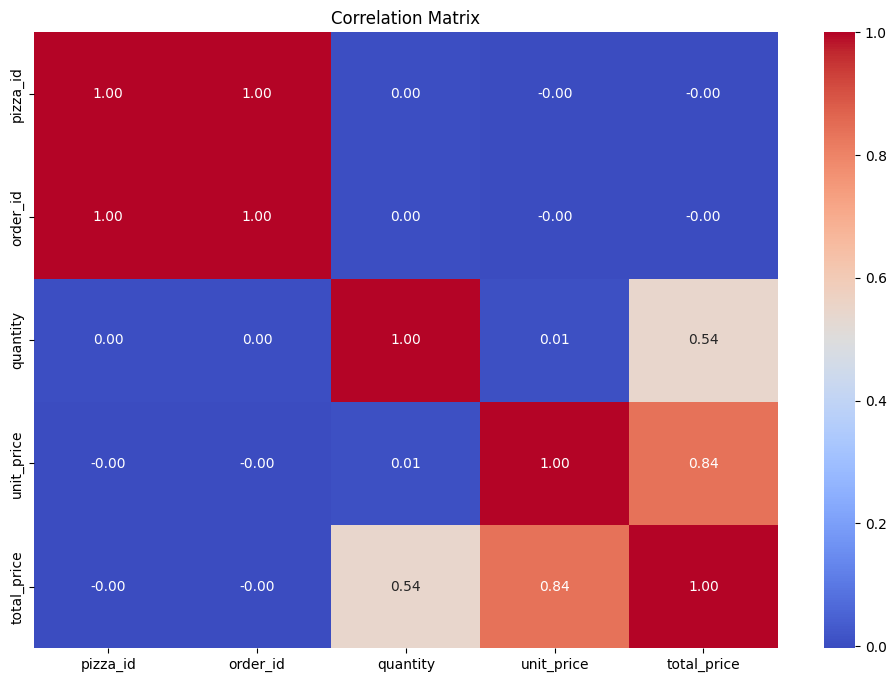

In [15]:
# Select only numeric columns for correlation
numeric_columns = sales_data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = sales_data[numeric_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

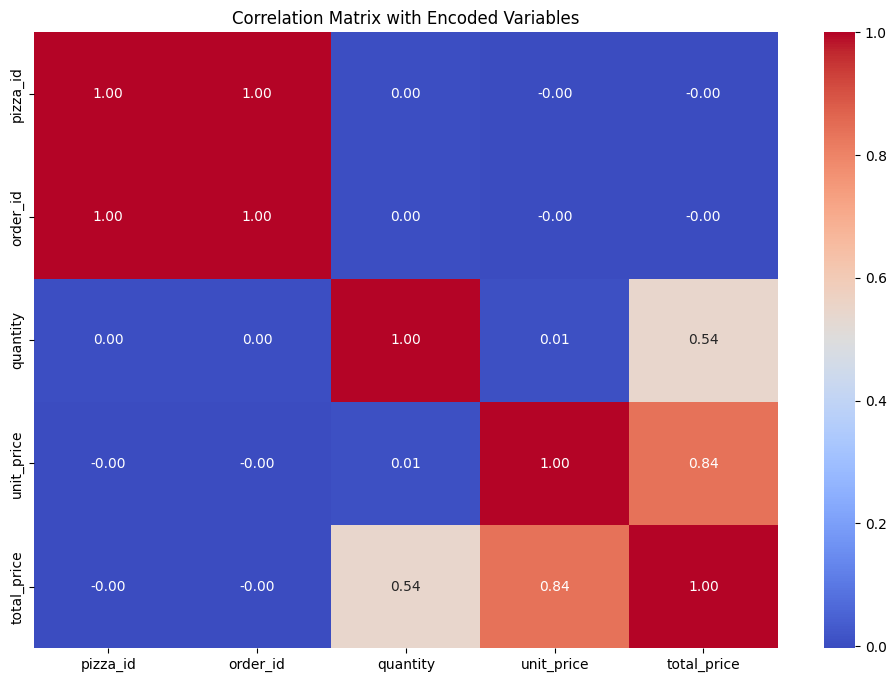

In [17]:
# One-hot encode categorical variables
sales_data_encoded = pd.get_dummies(sales_data, columns=['pizza_name'], drop_first=True)

# Now you can calculate the correlation matrix again
numeric_columns_encoded = sales_data_encoded.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix_encoded = sales_data_encoded[numeric_columns_encoded].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_encoded, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix with Encoded Variables')
plt.show()

In [20]:
# Convert the order_date column to datetime format
sales_data['order_date'] = pd.to_datetime(sales_data['order_date'], errors='coerce')

# Check for any NaT values that may have resulted from invalid date formats
print("Number of NaT values in order_date:", sales_data['order_date'].isnull().sum())

Number of NaT values in order_date: 29033


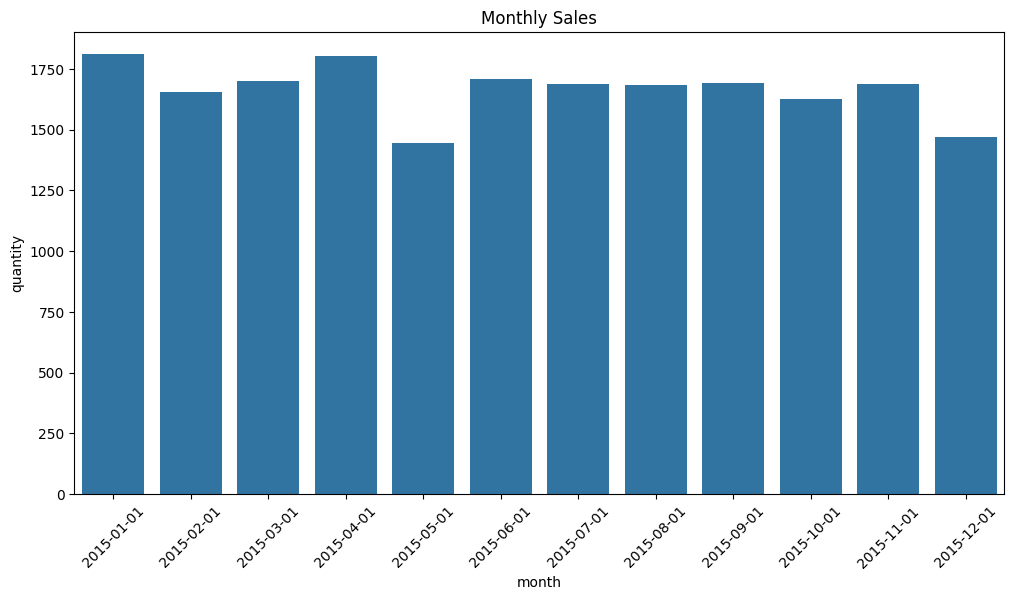

In [22]:
# Extract the month from the order_date
sales_data['month'] = sales_data['order_date'].dt.to_period('M')

# Group by month and sum the quantity sold
monthly_sales = sales_data.groupby('month')['quantity'].sum().reset_index()

# Convert the month back to a timestamp for plotting
monthly_sales['month'] = monthly_sales['month'].dt.to_timestamp()

# Plot the monthly sales
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_sales, x='month', y='quantity')  # Ensure you use the correct column name
plt.title('Monthly Sales')
plt.xticks(rotation=45)
plt.show()

In [32]:
print(sales_data.columns)

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name', 'month'],
      dtype='object')


In [36]:
import pandas as pd

# Example DataFrame creation
data = {
    'order_date': ['2023-01-15', '2023-01-20', '2023-02-10', '2023-02-15', '2023-03-05'],
    'quantity_sold': [10, 15, 20, 25, 30]
}
sales_data = pd.DataFrame(data)

# Convert the order_date column to datetime format
sales_data['order_date'] = pd.to_datetime(sales_data['order_date'], errors='coerce')

# Create the month column as a Period
sales_data['month'] = sales_data['order_date'].dt.to_period('M')

# Display the DataFrame to verify the new column
print(sales_data)

  order_date  quantity_sold    month
0 2023-01-15             10  2023-01
1 2023-01-20             15  2023-01
2 2023-02-10             20  2023-02
3 2023-02-15             25  2023-02
4 2023-03-05             30  2023-03


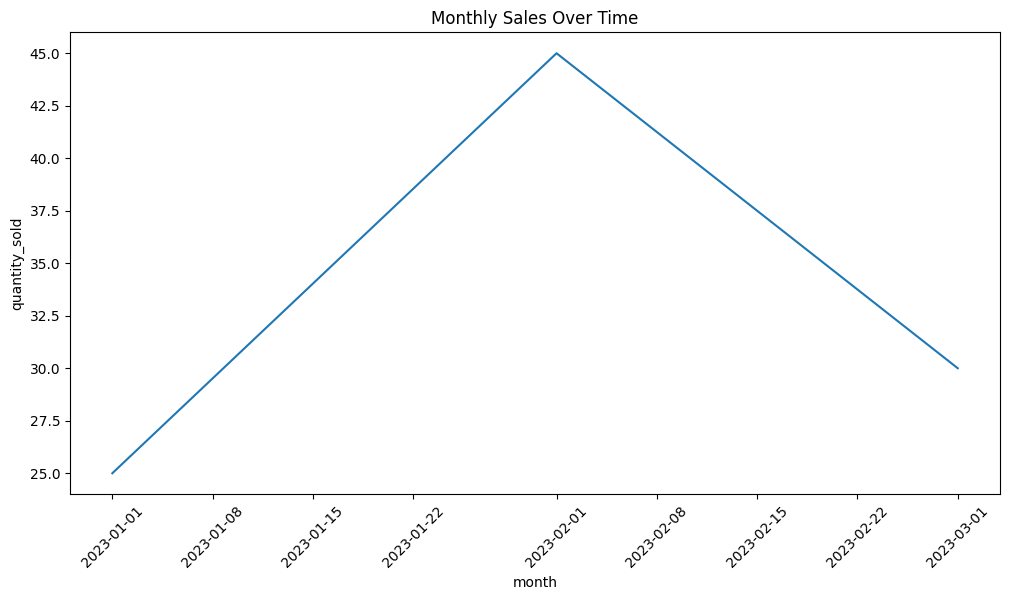

In [37]:
# Convert the order_date column to datetime format if not already done
sales_data['order_date'] = pd.to_datetime(sales_data['order_date'], errors='coerce')

# Create the month column as a Period
sales_data['month'] = sales_data['order_date'].dt.to_period('M')

# Group by month and sum the quantity sold
monthly_sales = sales_data.groupby('month')['quantity_sold'].sum().reset_index()

# Convert the month back to a timestamp for plotting
monthly_sales['month'] = monthly_sales['month'].dt.to_timestamp()  # This should work now

# Plot the monthly sales
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='month', y='quantity_sold')  # Ensure you use the correct column name
plt.title('Monthly Sales Over Time')
plt.xticks(rotation=45)
plt.show()

In [39]:
# Measure variability
print("Standard Deviation of Quantity Sold:", sales_data['quantity_sold'].std())

Standard Deviation of Quantity Sold: 7.905694150420948


In [40]:
# Check for discrepancies
# Check if any sales are negative
negative_sales = sales_data[sales_data['quantity_sold'] < 0]
print("Negative Sales Records:\n", negative_sales)

Negative Sales Records:
 Empty DataFrame
Columns: [order_date, quantity_sold, month]
Index: []


In [41]:
# Investigate unexpected results
# Example: Check for unusually high sales
high_sales = sales_data[sales_data['quantity_sold'] > sales_data['quantity_sold'].mean() + 3 * sales_data['quantity_sold'].std()]
print("High Sales Records:\n", high_sales)

High Sales Records:
 Empty DataFrame
Columns: [order_date, quantity_sold, month]
Index: []


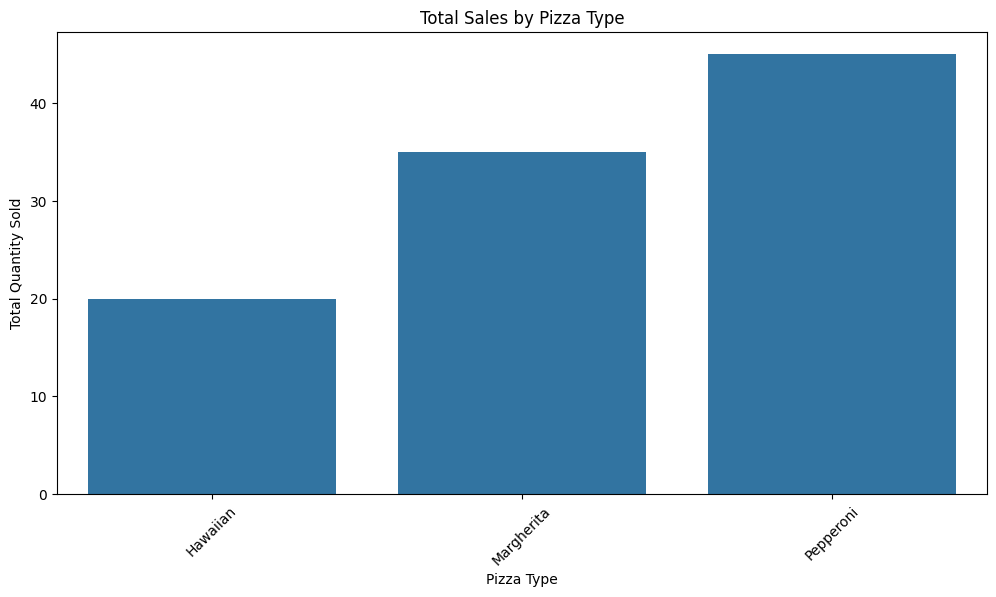

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame creation for demonstration
data = {
    'pizza_name': ['Margherita', 'Pepperoni', 'Hawaiian', 'Margherita', 'Pepperoni'],
    'quantity': [10, 15, 20, 25, 30]
}
sales_data = pd.DataFrame(data)

# Group by pizza name and sum the quantity sold
sales_by_type = sales_data.groupby('pizza_name')['quantity'].sum().reset_index()

# Plotting the sales by pizza type
plt.figure(figsize=(12, 6))
sns.barplot(data=sales_by_type, x='pizza_name', y='quantity')
plt.title('Total Sales by Pizza Type')
plt.xlabel('Pizza Type')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()